In [1]:
import numpy as np
import pandas as pd

import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

from pylab import rcParams
import seaborn as sb
import matplotlib.pyplot as plt

import sklearn
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm

np.set_printoptions(precision=4,suppress=True)
plt.figure(figsize=(10,3))
%matplotlib inline
plt.style.use('seaborn-whitegrid')




In [5]:
address='C:/Users/Vivek Vishan Jetani/Desktop/vivek.csv'
df=pd.read_csv(address)
def handle_non_numerical_data(df):
    columns=df.columns.values
    
    for column in columns:
        text_digit_vals={}
        def convert_to_int(val):
            return text_digit_vals[val]
        
        if df[column].dtype !=np.int64 and df[column].dtype !=np.float64:
            column_contents=df[column].values.tolist()
            unique_elements=set(column_contents)
            x=0

            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique]=x
                    x+=1
            df[column]=list(map(convert_to_int, df[column]))
    return df
df=handle_non_numerical_data(df)
print(df.head())


df.columns=['gender','category','SSC%','HSC%','classification','resource','place_of_study','attendance','GPA']
X=df.ix[:,(1,3,4,6)].values
Y=df.ix[:,(8)].values



   gender  category  SSC  HSC  classification  resource  place_of_study  \
0       1         0   70   65               0         1               2   
1       1         1   70   70               2         2               0   
2       1         1   70   65               2         1               2   
3       1         0   90   65               0         5               2   
4       1         1   90   90               1         2               2   

   attendance  GPA  
0        90.5  3.3  
1        70.5  3.3  
2        70.5  3.3  
3        90.5  3.8  
4        90.5  3.3  


C:\Users\Vivek Vishan Jetani\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [8]:
z=linkage(X,'ward')


Text(0,0.5,'Distance')

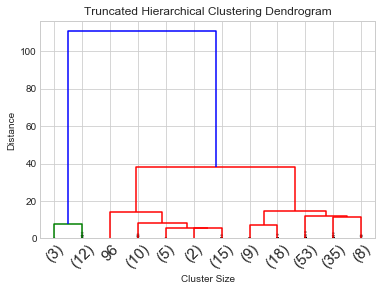

In [9]:
dendrogram(z,truncate_mode='lastp',p=12,leaf_rotation=45.,leaf_font_size=15,show_contracted=True)
plt.title('Truncated Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')



In [13]:
k=2
Hclustering=AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='ward')
Hclustering.fit(X)
sm.accuracy.score(y,Hclustering.labels_)

AttributeError: module 'sklearn.metrics' has no attribute 'accuracy'